Data Overview: 

The data includes cast, crew, keywords, budget, posters, release dates, languages, production companies, and countries.

The following are few important features present in dataset:
belongs_to_collection : This feautue is present only for true movie sequels.
budget: Buget of film in USD
genres
original_language: Language with the original version of the film.
original_title: Title of film when it is first officially released locally
overview: Describe the plot of the movie.
popularity
production_companies
production_countries
release_date
runtime: Length of movie.
spoken_languages: Languages spoken in the movie
status: Whether movie is release or not.
Keywords
cast: Information all cast memebers
crew: Information of, director, producer, writer etc.
revenue: Target variable. Revenue of film in USD

Data types present in dataset:
String
Numeric
Date
JSON

Handling JSON data
There are a number of attributes such as cast, crew, genres which represents important information about each movie. They are multivalued fields. Each value in these fields are a JSON object.
Example. of genres. [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]

From these JSON object, we will be extracting the name only. So the multivalued field will contain list of strings rather than list of JSON objects. For each multivalued field there will be many JSON object which means many name fields. Including all those name fields for encoding will increase the dimensionality of data by huge factor and this will impact the model training. This list of names can encoded further using MutliLabelBinarizer.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../Resources/data/tmdb_data.csv")
print(data.shape)
data.head(5)

(3000, 23)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## **Data Exploration**

In [3]:
data_explore = data.copy()

In [4]:
data_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [5]:
data_explore.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [6]:
data_explore['sequel'] = data_explore['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1).astype('int64')

In [7]:
# Function to extract the year, month and day on which movie is release. Date format is mm/dd/YY. 
def modify_date(x):
    x=str(x)
    year=x.split('/')[2]
    if int(year)<20:
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year
    
data_explore['release_date']=data_explore['release_date'].apply(lambda x: modify_date(x))
data_explore['release_year'] = pd.DatetimeIndex(data_explore['release_date']).year
data_explore['release_month'] = pd.DatetimeIndex(data_explore['release_date']).month
data_explore['release_day'] = pd.DatetimeIndex(data_explore['release_date']).day
data_explore['release_dayofweek'] = pd.DatetimeIndex(data_explore['release_date']).dayofweek

In [8]:
data_explore.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,sequel,release_year,release_month,release_day,release_dayofweek
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/2015,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,2015,2,20,4
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/2004,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,2004,8,6,4
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/2014,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,2014,10,10,4
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/2012,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,2012,3,9,4
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/2009,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,2009,2,5,3


In [9]:
# drop_cols = ['id', 'belongs_to_collection', 'homepage', 'imdb_id', 'release_date', 'poster_path', 'tagline', 'title']
# data_explore = data_explore.drop(columns=drop_cols, axis=1)

In [10]:
nan_cols = data_explore.isna().sum()
nan_cols[nan_cols>0]

belongs_to_collection    2396
genres                      7
homepage                 2054
overview                    8
poster_path                 1
production_companies      156
production_countries       55
runtime                     2
spoken_languages           20
tagline                   597
Keywords                  276
cast                       13
crew                       16
dtype: int64

In [11]:
data_explore.describe()

,id,budget,popularity,runtime,revenue,sequel,release_year,release_month,release_day,release_dayofweek
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07,0.201333,1999.713000,6.775333,15.046333,3.269333
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08,0.401063,15.423313,3.409115,8.632981,1.306150
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,0.000000,1921.000000,1.000000,1.000000,0.000000
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06,0.000000,1993.000000,4.000000,8.000000,2.000000
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,0.000000,2004.000000,7.000000,15.000000,4.000000
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07,0.000000,2011.000000,10.000000,22.000000,4.000000
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,1.000000,2017.000000,12.000000,31.000000,6.000000


Min budget, runtime is zero
Min revenue is one

In [12]:
import ast
dict_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

for col in dict_cols:
    data_explore[col] = data_explore[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [13]:
na_cols = data_explore.columns[data_explore.isna().any()].tolist()
na_cols.remove('overview')
na_cols.remove('runtime')
data_explore['runtime'].fillna(value=data_explore['runtime'].median(), inplace=True)
data_explore['overview'].fillna(value='', inplace=True)
for col in na_cols:
    data_explore[col].fillna(value='', inplace=True)

In [14]:
# Fetch the name field from each JSON object. Extract the Director from Crew only and extract first 3 main cast members from the cast field (main roles from movie)

def get_names(x, col):
    names = []
    for item in x:
        if col=='crew':
            if item['job']=='Director':
                names.append(item['name'])
        elif col=='cast':
            if item['order'] in (0, 1, 2):
                names.append(item['name'])
        else:
            names.append(item['name'])
    return names

    
for col in dict_cols:
    data_explore[col] = data_explore[col].apply(lambda x: get_names(x, col))

In [15]:
data_explore.head(n=3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,sequel,release_year,release_month,release_day,release_dayofweek
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/2015,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke]",[Steve Pink],12314651,1,2015,2,20,4
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/2004,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]",[Garry Marshall],95149435,1,2004,8,6,4
2,3,,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/2014,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist]",[Damien Chazelle],13092000,0,2014,10,10,4


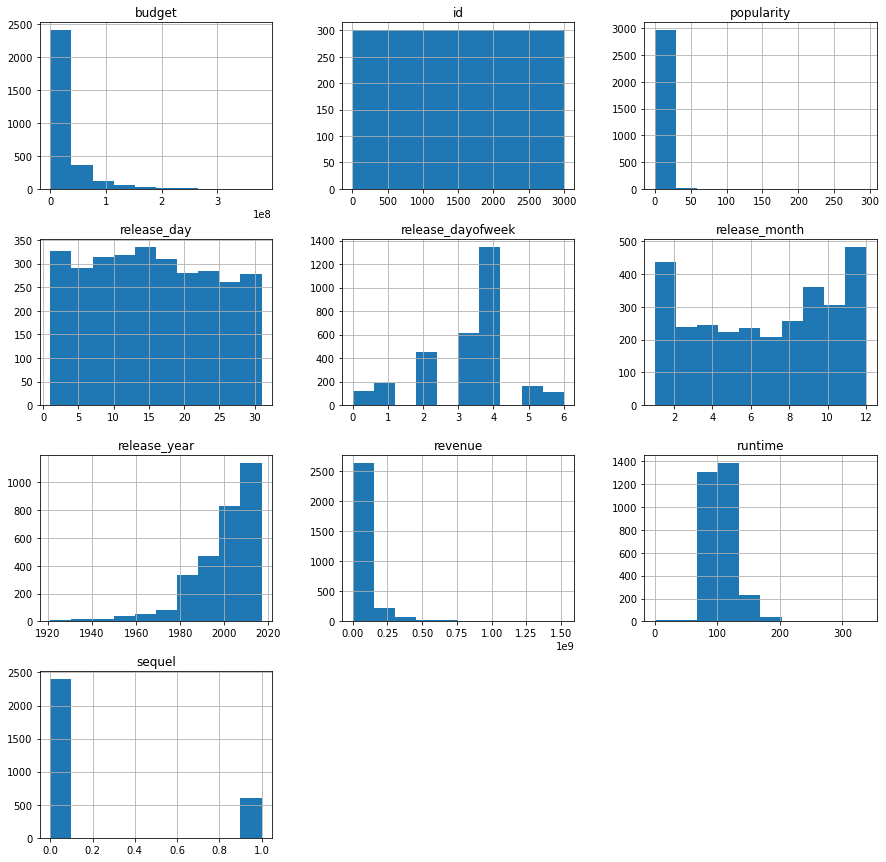

In [16]:
data_explore.hist(figsize=(15, 15))
plt.show()

## **Top 10 Most Popular Movies**

In [17]:
most_popular = data_explore.sort_values('popularity', ascending=False).head(10)
most_popular['revenue(million)'] = most_popular['revenue'].apply(lambda x : x//1000000)    # revenue in millions
most_popular['budget(million)'] = most_popular['budget'].apply(lambda x : x//1000000)    # budget in millions
most_popular[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,original_title,production_companies,popularity,cast,crew,budget(million),revenue(million)
518,"[Action, Adventure, Fantasy]",Wonder Woman,"[Dune Entertainment, Atlas Entertainment, Warn...",294.337037,[],[],149,820
684,"[Family, Fantasy, Romance]",Beauty and the Beast,"[Walt Disney Pictures, Mandeville Films]",287.253654,"[Emma Watson, Dan Stevens, Luke Evans]",[Bill Condon],160,1262
1695,"[Action, Crime]",Baby Driver,"[Big Talk Productions, TriStar Pictures, Media...",228.032744,"[Ansel Elgort, Lily James, Kevin Spacey]",[Edgar Wright],34,224
2326,"[Action, Adventure, Comedy]",Deadpool,"[Twentieth Century Fox Film Corporation, Marve...",187.860492,"[Ryan Reynolds, Morena Baccarin, Ed Skrein]",[Tim Miller],58,783
2126,"[Action, Adventure, Comedy, Science Fiction]",Guardians of the Galaxy Vol. 2,"[Walt Disney Pictures, Marvel Studios]",185.330992,"[Chris Pratt, Zoe Saldana, Dave Bautista]",[James Gunn],200,863
1309,"[Mystery, Thriller, Drama]",Gone Girl,"[Twentieth Century Fox Film Corporation, Regen...",154.801009,"[Ben Affleck, Rosamund Pike, Carrie Coon]",[David Fincher],61,369
1715,"[Drama, Science Fiction, War]",War for the Planet of the Apes,[Chernin Entertainment],146.161786,"[Andy Serkis, Woody Harrelson, Steve Zahn]",[Matt Reeves],152,369
1673,"[Drama, Action, Crime, Thriller]",The Dark Knight,"[DC Comics, Legendary Pictures, Warner Bros., ...",123.167259,"[Christian Bale, Michael Caine, Heath Ledger]",[Christopher Nolan],185,1004
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519
2293,"[Drama, Thriller, Science Fiction]",The Circle,"[Likely Story, Playtone, Image Nation]",88.439243,"[Emma Watson, Tom Hanks, John Boyega]",[James Ponsoldt],18,20


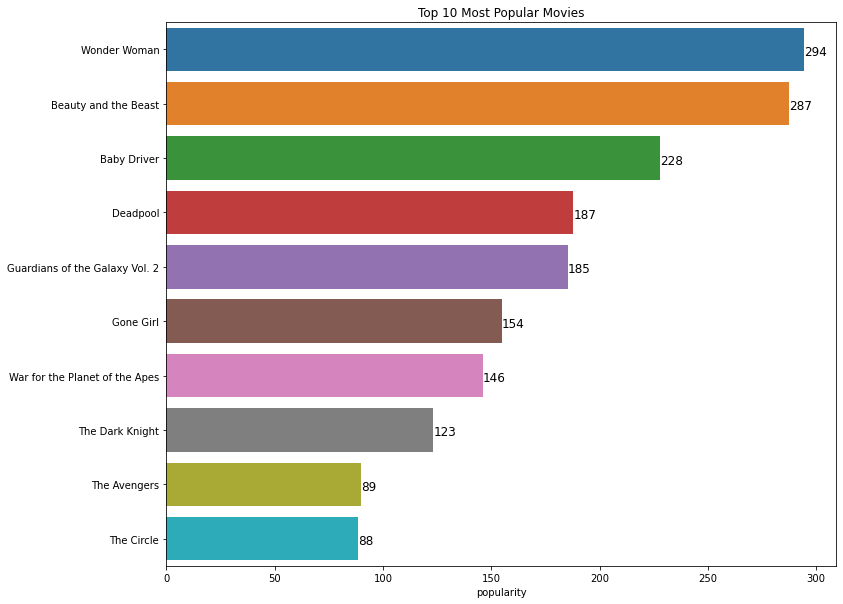

In [18]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='popularity', data=most_popular, order=most_popular.sort_values('popularity', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Most Popular Movies', fontsize=12)
plt.ylabel('')
plt.show()

## **Top 10 Highest Revenue Movies**

In [19]:
highest_revenue = data_explore.sort_values('revenue', ascending=False).head(10)
highest_revenue['revenue(million)'] = highest_revenue['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_revenue['budget(million)'] = highest_revenue['budget'].apply(lambda x : x//1000000)    # budget in millions
highest_revenue[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,original_title,production_companies,popularity,cast,crew,budget(million),revenue(million)
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519
1761,[Action],Furious 7,"[Universal Pictures, Original Film, Fuji Telev...",27.275687,"[Vin Diesel, Paul Walker, Dwayne Johnson]",[James Wan],190,1506
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405
684,"[Family, Fantasy, Romance]",Beauty and the Beast,"[Walt Disney Pictures, Mandeville Films]",287.253654,"[Emma Watson, Dan Stevens, Luke Evans]",[Bill Condon],160,1262
2322,"[Action, Science Fiction, Adventure]",Transformers: Dark of the Moon,"[Paramount Pictures, Di Bonaventura Pictures, ...",4.503505,"[Shia LaBeouf, John Malkovich, Ken Jeong]",[Michael Bay],195,1123
906,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",20.582580,[],[],250,1084
2135,"[Adventure, Action, Fantasy]",Pirates of the Caribbean: On Stranger Tides,"[Walt Disney Pictures, Jerry Bruckheimer Films...",27.887720,"[Johnny Depp, Pen√©lope Cruz, Ian McShane]",[Rob Marshall],380,1045
2562,"[Adventure, Animation, Comedy, Family]",Finding Dory,"[Walt Disney Pictures, Pixar Animation Studios...",14.477677,"[Ellen DeGeneres, Albert Brooks, Hayden Rolence]","[Andrew Stanton, Angus MacLane]",200,1028
881,"[Family, Fantasy, Adventure]",Alice in Wonderland,"[Walt Disney Pictures, Team Todd, Tim Burton P...",17.285093,"[Mia Wasikowska, Johnny Depp, Anne Hathaway]",[Tim Burton],200,1025
734,"[Animation, Adventure, Family, Comedy]",Zootopia,"[Walt Disney Pictures, Walt Disney Animation S...",26.024868,"[Ginnifer Goodwin, Jason Bateman, Shakira]","[Byron Howard, Rich Moore, Jared Bush]",150,1023


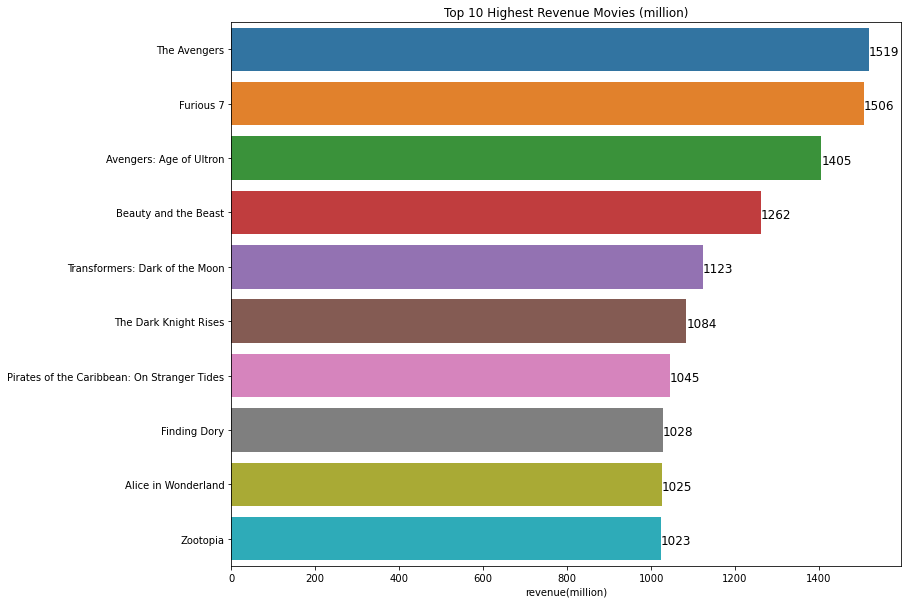

In [20]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='revenue(million)', data=highest_revenue, order=highest_revenue.sort_values('revenue(million)', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Highest Revenue Movies (million)', fontsize=12)
plt.ylabel('')
plt.show()

## **Top 10 Highest Budgeted Movies**

In [21]:
highest_budget = data_explore.sort_values('budget', ascending=False).head(10)
highest_budget['revenue(million)'] = highest_budget['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_budget['budget(million)'] = highest_budget['budget'].apply(lambda x : x//1000000)    # budgest in millions
highest_budget[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,original_title,production_companies,popularity,cast,crew,budget(million),revenue(million)
2135,"[Adventure, Action, Fantasy]",Pirates of the Caribbean: On Stranger Tides,"[Walt Disney Pictures, Jerry Bruckheimer Films...",27.887720,"[Johnny Depp, Pen√©lope Cruz, Ian McShane]",[Rob Marshall],380,1045
2209,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,"[Walt Disney Pictures, Jerry Bruckheimer Films...",31.363664,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],300,961
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405
1425,"[Adventure, Fantasy, Action, Science Fiction]",Superman Returns,"[DC Comics, Legendary Pictures, Warner Bros., ...",13.284712,"[Brandon Routh, Kevin Spacey, Kate Bosworth]",[Bryan Singer],270,391
1270,"[Action, Adventure, Science Fiction]",John Carter,[Walt Disney Pictures],14.670353,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],260,284
1630,"[Action, Science Fiction, Thriller, Adventure]",Transformers: The Last Knight,"[Paramount Pictures, Di Bonaventura Pictures, ...",39.186819,"[Mark Wahlberg, Josh Duhamel, Laura Haddock]",[Michael Bay],260,604
2532,"[Adventure, Fantasy, Action]",The Hobbit: An Unexpected Journey,"[WingNut Films, New Line Cinema, Warner Bros. ...",23.253089,"[Ian McKellen, Martin Freeman, Richard Armitage]",[Peter Jackson],250,1021
961,"[Adventure, Fantasy, Family]",Harry Potter and the Half-Blood Prince,"[Warner Bros., Heyday Films]",19.083723,"[Daniel Radcliffe, Rupert Grint, Emma Watson]",[David Yates],250,933
906,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",20.582580,[],[],250,1084
666,"[Adventure, Fantasy]",The Hobbit: The Desolation of Smaug,"[WingNut Films, New Line Cinema, Warner Bros. ...",20.644776,"[Martin Freeman, Ian McKellen, Richard Armitage]",[Peter Jackson],250,958


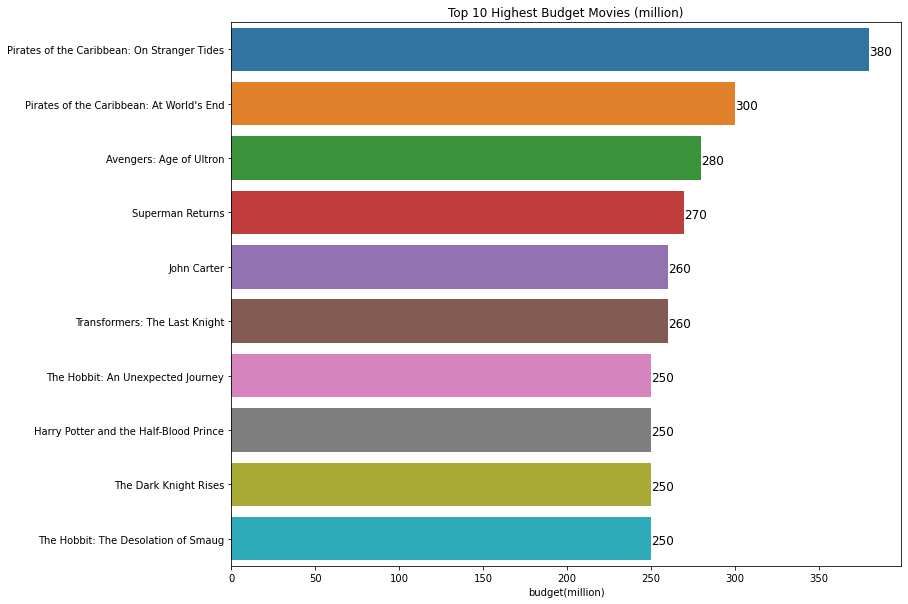

In [22]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='budget(million)', data=highest_budget, order=highest_budget.sort_values('budget(million)', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Highest Budget Movies (million)', fontsize=12)
plt.ylabel('')
plt.show()

## **Top 10 Highest Profit Movies**

In [23]:
highest_profit = data_explore.copy()
highest_profit['revenue(million)'] = highest_profit['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_profit['budget(million)'] = highest_profit['budget'].apply(lambda x : x//1000000)    # budget in millions
highest_profit['profit(million)'] = highest_profit['revenue(million)']-highest_profit['budget(million)']
highest_profit = highest_profit.sort_values('profit(million)', ascending=False).head(10)
highest_profit[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'budget(million)', 'revenue(million)', 'profit(million)']]

,genres,original_title,production_companies,popularity,cast,crew,budget(million),revenue(million),profit(million)
1761,[Action],Furious 7,"[Universal Pictures, Original Film, Fuji Telev...",27.275687,"[Vin Diesel, Paul Walker, Dwayne Johnson]",[James Wan],190,1506,1316
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519,1299
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405,1125
684,"[Family, Fantasy, Romance]",Beauty and the Beast,"[Walt Disney Pictures, Mandeville Films]",287.253654,"[Emma Watson, Dan Stevens, Luke Evans]",[Bill Condon],160,1262,1102
2322,"[Action, Science Fiction, Adventure]",Transformers: Dark of the Moon,"[Paramount Pictures, Di Bonaventura Pictures, ...",4.503505,"[Shia LaBeouf, John Malkovich, Ken Jeong]",[Michael Bay],195,1123,928
734,"[Animation, Adventure, Family, Comedy]",Zootopia,"[Walt Disney Pictures, Walt Disney Animation S...",26.024868,"[Ginnifer Goodwin, Jason Bateman, Shakira]","[Byron Howard, Rich Moore, Jared Bush]",150,1023,873
1735,"[Adventure, Science Fiction]",Jurassic Park,"[Universal Pictures, Amblin Entertainment]",8.863776,"[Sam Neill, Laura Dern, Jeff Goldblum]",[Steven Spielberg],63,920,857
543,"[Adventure, Fantasy, Action]",The Lord of the Rings: The Two Towers,"[WingNut Films, New Line Cinema, The Saul Zaen...",29.423537,"[Elijah Wood, Ian McKellen, Viggo Mortensen]",[Peter Jackson],79,926,847
906,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",20.582580,[],[],250,1084,834
2562,"[Adventure, Animation, Comedy, Family]",Finding Dory,"[Walt Disney Pictures, Pixar Animation Studios...",14.477677,"[Ellen DeGeneres, Albert Brooks, Hayden Rolence]","[Andrew Stanton, Angus MacLane]",200,1028,828


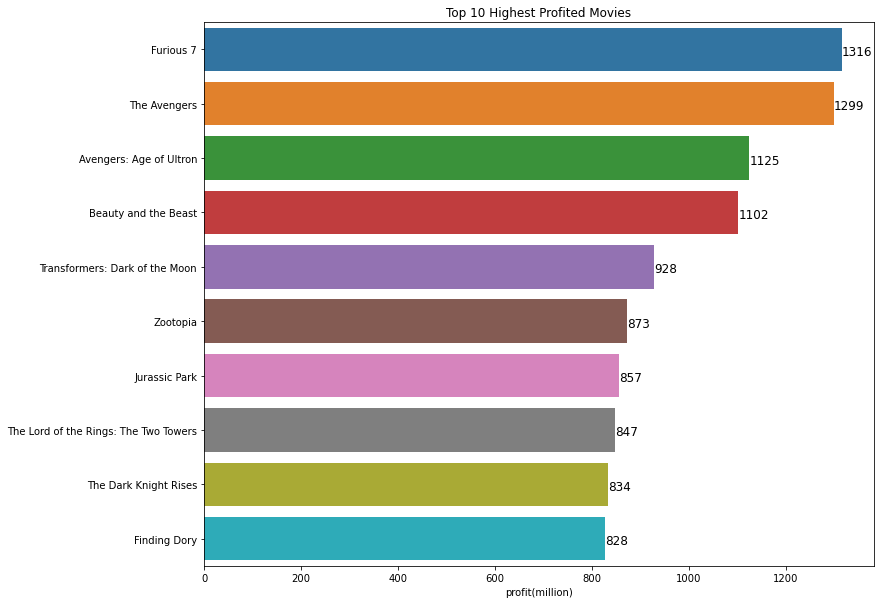

In [24]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='profit(million)', data=highest_profit, order=highest_profit.sort_values('profit(million)', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Highest Profited Movies', fontsize=12)
plt.ylabel('')
plt.show()

## **Genre**

In [25]:
data_explore_encode = data_explore['genres'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
data_explore_genres = pd.concat([data_explore, data_explore_encode], axis=1)
genres = data_explore_encode.columns
data_explore_genres.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,sequel,release_year,release_month,release_day,release_dayofweek,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/2015,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke]",[Steve Pink],12314651,1,2015,2,20,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/2004,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]",[Garry Marshall],95149435,1,2004,8,6,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/2014,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist]",[Damien Chazelle],13092000,0,2014,10,10,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],[India],3/9/2012,122.0,"[English, हिन्दी]",Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",[Sujoy Ghosh],16000000,0,2012,3,9,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,,0,"[Action, Thriller]",,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],[South Korea],2/5/2009,118.0,[한국어/조선말],Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon]",[Jong-seok Yoon],3923970,0,2009,2,5,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
genres_info = []
for col in genres:
    total_movies, total_budget, median_budget, total_revenue, median_revenue, median_popularity=0, 0, 0, 0, 0, 0
    total_movies = data_explore_genres[data_explore_genres[col]==1][col].count()
    total_budget = data_explore_genres[data_explore_genres[col]==1]['budget'].sum()
    median_budget = data_explore_genres[data_explore_genres[col]==1]['budget'].median()
    total_revenue = data_explore_genres[data_explore_genres[col]==1]['revenue'].sum()
    median_revenue = data_explore_genres[data_explore_genres[col]==1]['revenue'].median()
    median_popularity = data_explore_genres[data_explore_genres[col]==1]['popularity'].median()
    genres_info.append([col, total_movies, total_budget, median_budget, total_revenue, median_revenue, median_popularity])

In [27]:
genres_info = pd.DataFrame(genres_info, columns=['genres', 'movies_count', 'total_budget', 'median_budget', 'total_revenue', 'median_revenue', 'median_popularity'])
genres_info['total_budget(million)'] = genres_info['total_budget'].apply(lambda x : x//1000000)    # budget in millions
genres_info['median_budget(million)'] = genres_info['median_budget'].apply(lambda x : x//1000000)    # budget in millions
genres_info['total_revenue(million)'] = genres_info['total_revenue'].apply(lambda x : x//1000000)    # revenue in millions
genres_info['median_revenue(million)'] = genres_info['median_revenue'].apply(lambda x : x//1000000)    # revenue in millions
genres_info[['genres', 'movies_count', 'total_budget(million)', 'median_budget(million)', 'total_revenue(million)', 'median_revenue(million)', 'median_popularity']]

,genres,movies_count,total_budget(million),median_budget(million),total_revenue(million),median_revenue(million),median_popularity
0,Comedy,1028,19614,8.0,62580,18.0,6.905488
1,Drama,1531,25733,6.0,69516,11.0,6.793972
2,Family,260,11048,24.0,36113,57.0,8.416440
3,Romance,571,8944,5.0,30094,14.0,6.370105
4,Thriller,789,20873,13.0,53917,21.0,8.371005
5,Action,741,29934,20.0,82283,36.0,8.345985
6,Animation,141,5967,23.0,20830,36.0,9.409701
7,Adventure,439,23738,28.0,77180,59.0,9.961184
8,Horror,301,4578,6.0,15865,17.0,8.122042
9,Documentary,87,76,0.0,403,0.0,1.949044


## **Total count of Movies per Genre**

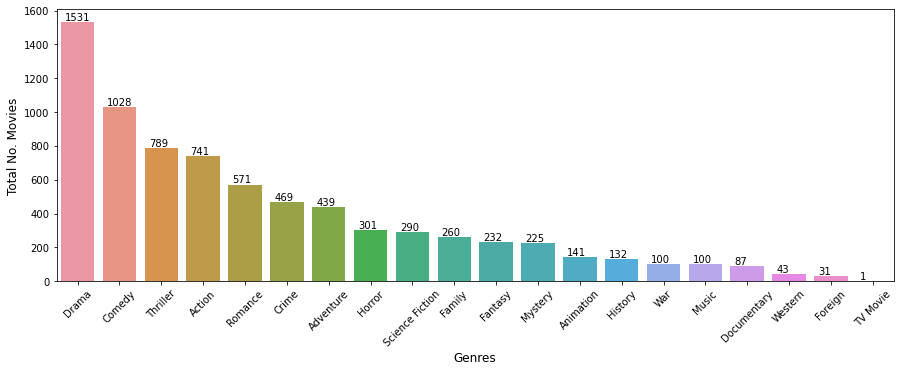

In [28]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='movies_count', data=genres_info, order=genres_info.sort_values('movies_count', ascending=False).genres)
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_height())), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation=45)
plt.ylabel('Total No. Movies', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

## **Median Popularity per Genre**

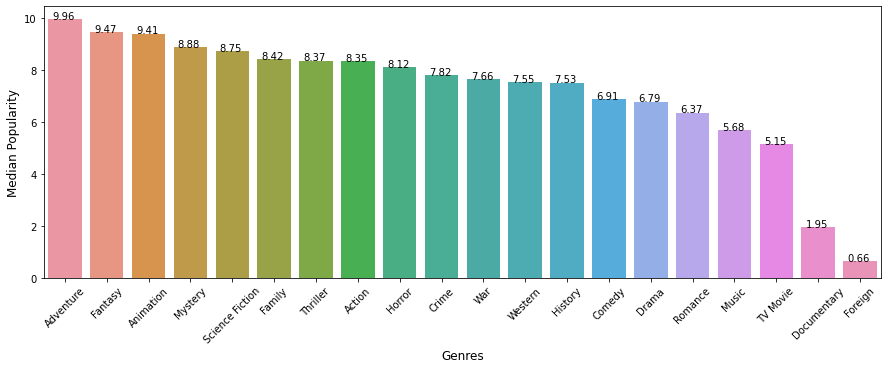

In [29]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='median_popularity', data=genres_info, order=genres_info.sort_values('median_popularity', ascending=False).genres)
for p in ax.patches:
        ax.annotate('{}'.format(np.round(p.get_height(), 2)), (p.get_x()+0.1, p.get_height()))
plt.xticks(rotation=45)
plt.ylabel('Median Popularity', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

## **Median Movie Revenue v Budget per Genre**

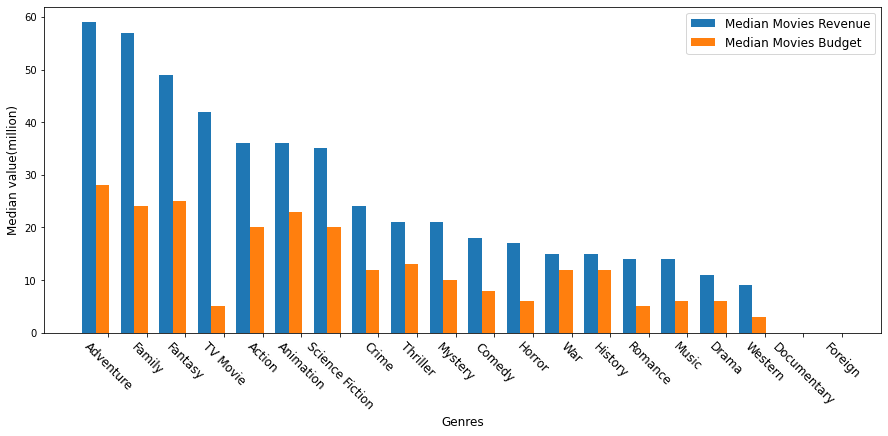

In [30]:
plt.figure(figsize=(15, 6))
x_indexes = np.arange(len(genres))     
width = 0.35                            
genres_info = genres_info.sort_values('median_revenue(million)', ascending=False)
plt.bar(x_indexes,  genres_info['median_revenue(million)'], label="Median Movies Revenue", width=width)
plt.bar(x_indexes + width,  genres_info['median_budget(million)'], label="Median Movies Budget", width=width)
plt.legend(loc="upper right", fontsize=12)
plt.xticks(ticks=x_indexes+0.5, labels=genres_info['genres'].values, fontsize=12, rotation=-45)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Median value(million)', fontsize=12)
plt.show()

## **Revenue Observations**

(31.5, 89.5)

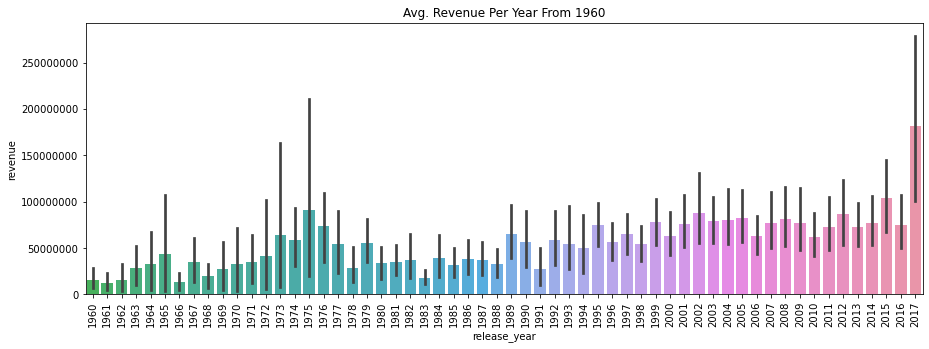

In [31]:
plt.figure(figsize=(15, 5))
sns.barplot(x='release_year', y='revenue', data=data_explore, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue Per Year From 1960')
ax.set_xlim(left=31.5)

Text(0.5, 1.0, 'Avg. Revenue Per Month')

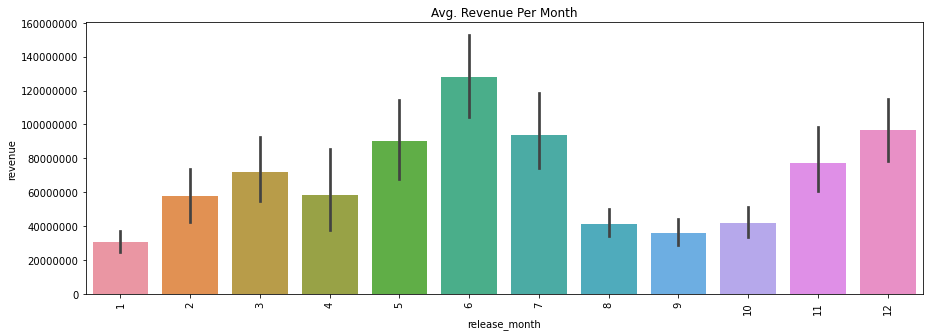

In [32]:
plt.figure(figsize=(15, 5))
sns.barplot(x='release_month', y='revenue', data=data_explore, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue Per Month')

Text(0.5, 1.0, 'Avg. Revenue for Each Day of Week')

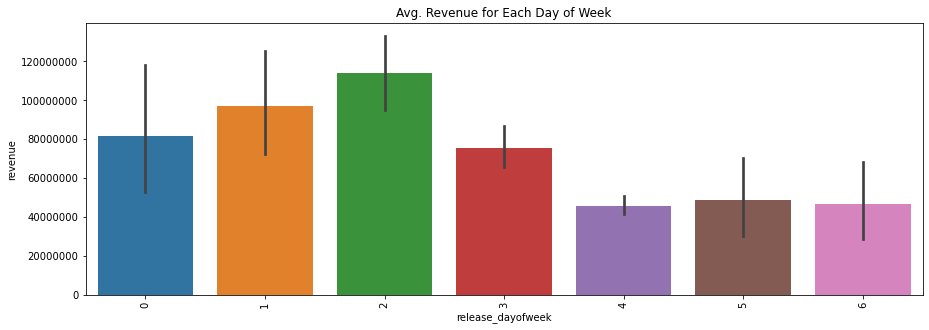

In [33]:
plt.figure(figsize=(15, 5))
sns.barplot(x='release_dayofweek', y='revenue', data=data_explore, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue for Each Day of Week')

In [34]:
def boxplot_sorted(df, by, column):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.mean().sort_values(ascending=False)
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot()

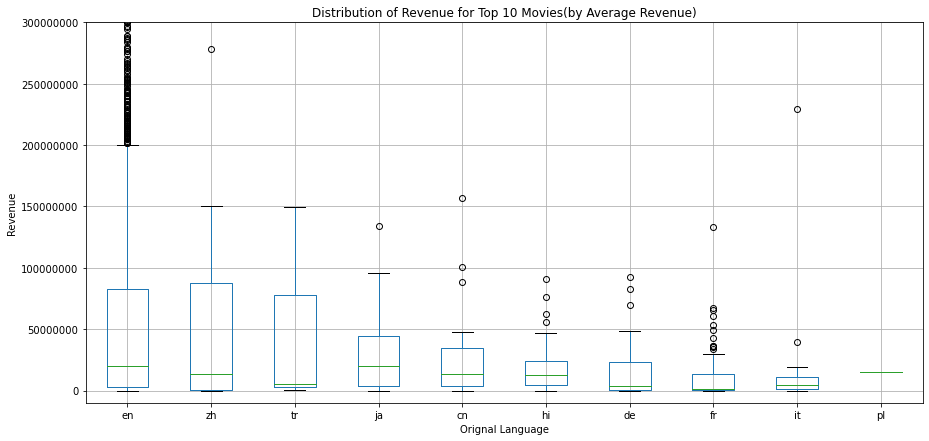

In [35]:
plt.figure(figsize=(15, 7))
axes = boxplot_sorted(data_explore, by = ['original_language'], column = 'revenue')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_ylim((-10000000, 300000000))
ax.set_xlim(right=10.5)
plt.xlabel('Orignal Language')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue for Top 10 Movies(by Average Revenue)')
plt.show()


In [77]:
#sklearn.preprocessing.OneHotEncoder¶
from sklearn.preprocessing import OneHotEncoder

language_df = data_explore_genres[['original_language']]
language_df

,original_language
0,en
1,en
2,en
3,hi
4,ko
5,en
6,en
7,en
8,en
9,en


# Corelation Plot

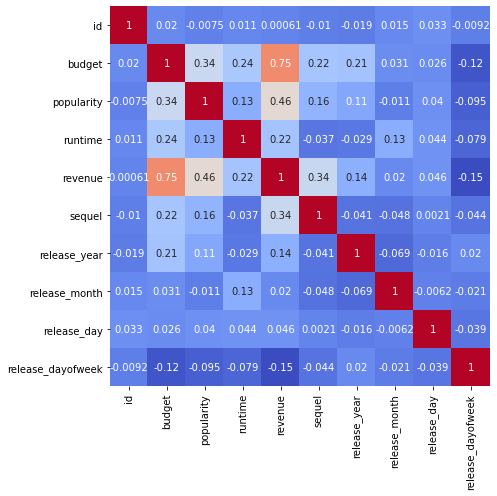

In [36]:
plt.figure(figsize=(12, 7))
corr_matrix = data_explore.corr()
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=True, cbar=False,cmap='coolwarm')
plt.tight_layout()

In [37]:
corr_matrix['revenue'].sort_values(ascending=False)

revenue              1.000000
budget               0.752965
popularity           0.461460
sequel               0.339425
runtime              0.216417
release_year         0.137933
release_day          0.045699
release_month        0.020164
id                   0.000610
release_dayofweek   -0.148046
Name: revenue, dtype: float64

# Data Preprocessing

In [38]:
data_explore_genres.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'sequel', 'release_year', 'release_month', 'release_day',
       'release_dayofweek', 'Comedy', 'Drama', 'Family', 'Romance', 'Thriller',
       'Action', 'Animation', 'Adventure', 'Horror', 'Documentary', 'Music',
       'Crime', 'Science Fiction', 'Mystery', 'Foreign', 'Fantasy', 'War',
       'Western', 'History', 'TV Movie'],
      dtype='object')

In [39]:
model_df = data_explore_genres[['budget','runtime','sequel', 'release_year','Comedy', 'Drama', 
                                'Family', 'Romance', 'Thriller','Action', 'Animation', 'Adventure', 
                                'Horror', 'Documentary', 'Music','Crime', 'Science Fiction', 'Mystery', 
                                'Foreign','Fantasy', 'War','Western', 'History', 'TV Movie']]

In [40]:
model_df.head(5)

,budget,runtime,sequel,release_year,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie
0,14000000,93.0,1,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,40000000,113.0,1,2004,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3300000,105.0,0,2014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200000,122.0,0,2012,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,118.0,0,2009,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
data_explore['popularity_rating'] = np.where(data_explore['popularity'] >5, 1, 0)

Amended popularity score to reflect the medium ~7.3 and this decreased the accuracey score to "Test Acc: 0.665". Reverted back to >5

In [60]:
data_explore.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,sequel,release_year,release_month,release_day,release_dayofweek,popularity_rating
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/2015,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke]",[Steve Pink],12314651,1,2015,2,20,4,1
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/2004,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]",[Garry Marshall],95149435,1,2004,8,6,4,1
2,3,,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/2014,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist]",[Damien Chazelle],13092000,0,2014,10,10,4,1
3,4,,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],[India],3/9/2012,122.0,"[English, हिन्दी]",Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",[Sujoy Ghosh],16000000,0,2012,3,9,4,0
4,5,,0,"[Action, Thriller]",,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],[South Korea],2/5/2009,118.0,[한국어/조선말],Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon]",[Jong-seok Yoon],3923970,0,2009,2,5,3,0


## **Modelling**

### **Multiple Linear Regression**

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [62]:
# Assign the data to X and y

X = model_df
y = data_explore['revenue'].values.reshape(-1, 1)
print(X.shape, y.shape)

(3000, 24) (3000, 1)


In [63]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
x_train_scaled = x_scaler.transform(X_train)
y_train_scaled = y_scaler.transform(y_train)

x_test_scaled = x_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test)

In [65]:
# Fit the model to the training data and calculate the scores for the training and testing data
model = LinearRegression()
model.fit(x_train_scaled, y_train_scaled)
training_score = model.score(x_train_scaled, y_train_scaled)
testing_score = model.score(x_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6213945885378929
Testing Score: 0.5770232871063292


Text(0.5, 1.0, 'Residual Plot')

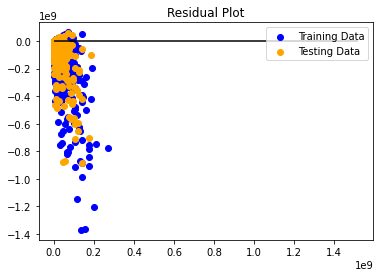

In [66]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [67]:
import pickle
pickle.dump(model, open('../Resources/model_mlr.pkl','wb'))

### **Support Vector Classification Machines**

https://scikit-learn.org/stable/modules/svm.html

In [68]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
import pandas as pd
import numpy as np
import os

In [69]:
model_df.head(5)

,budget,runtime,sequel,release_year,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie
0,14000000,93.0,1,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,40000000,113.0,1,2004,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3300000,105.0,0,2014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200000,122.0,0,2012,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,118.0,0,2009,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
# Assign the data to X and y

X = model_df
y = data_explore['popularity_rating'].values.reshape(-1, 1)
print(X.shape, y.shape)

(3000, 24) (3000, 1)


In [71]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [72]:
x_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
x_train_scaled = x_scaler.transform(X_train)
y_train_scaled = y_scaler.transform(y_train)

x_test_scaled = x_scaler.transform(X_test)
pickle.dump(x_scaler, open('../Resources/scaler.pkl','wb'))
y_test_scaled = y_scaler.transform(y_test)

In [73]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(x_train_scaled, y_train)

SVC(kernel='linear')

In [74]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(x_test_scaled, y_test))

Test Acc: 0.753


In [75]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       205
           1       0.73      1.00      0.84       545

    accuracy                           0.73       750
   macro avg       0.36      0.50      0.42       750
weighted avg       0.53      0.73      0.61       750



In [76]:
import pickle
pickle.dump(model, open('../Resources/model_svc.pkl','wb'))